In [1]:
# Initial imports.
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.ensemble import EasyEnsembleClassifier
import seaborn as sns

In [67]:
# Import dataset
wine_df = pd.read_csv(Path("resources/wine2.csv"),index_col=0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [68]:
# Drop duplicate entries
wine_df= wine_df.drop_duplicates()
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [69]:
# Applying the condition for quality
wine_df.loc[wine_df["quality"] < 7, "quality"] = 0
wine_df.loc[wine_df["quality"] >= 7, "quality"] = 1


In [47]:
wine_df.loc[wine_df["quality"] == 0, "quality"] = "Bad"
wine_df.loc[wine_df["quality"] == 1, "quality"] = "Good"
wine_df.loc[wine_df["type"] == 0, "type"] = "Red"
wine_df.loc[wine_df["type"] == 1, "type"] = "White"

<AxesSubplot:xlabel='type', ylabel='sulphates'>

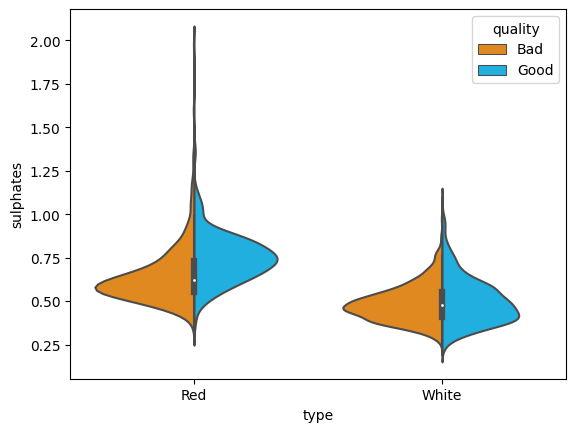

In [48]:
sns.violinplot(data=wine_df, x="type", y="sulphates", hue="quality", split=True, palette=["darkorange", "deepskyblue"])

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

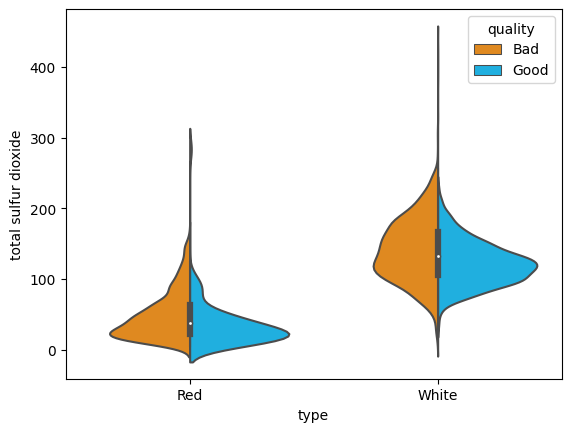

In [50]:
sns.violinplot(data=wine_df, x="type", y="total sulfur dioxide", hue="quality", split=True, palette=["darkorange", "deepskyblue"])

<AxesSubplot:xlabel='type', ylabel='chlorides'>

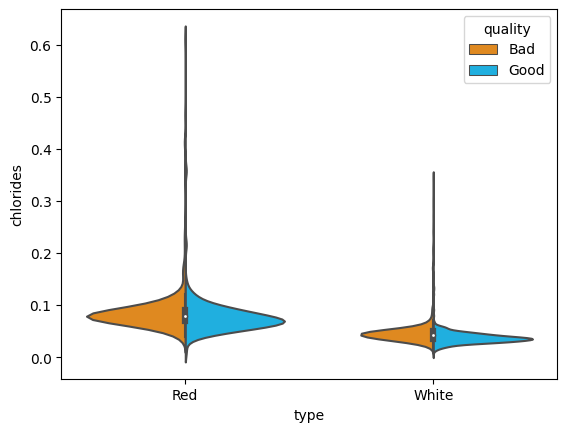

In [51]:
sns.violinplot(data=wine_df, x="type", y="chlorides", hue="quality", split=True, palette=["darkorange", "deepskyblue"])

<AxesSubplot:xlabel='type', ylabel='density'>

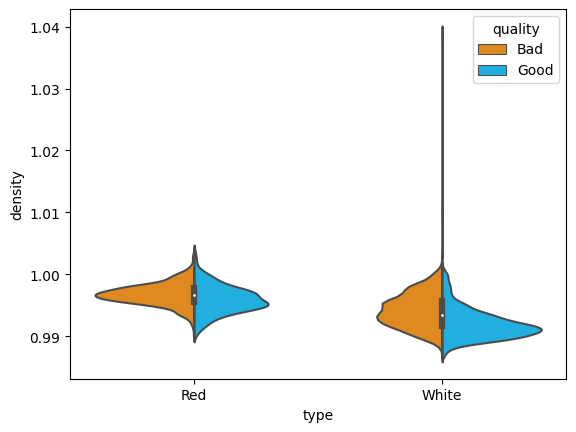

In [52]:
sns.violinplot(data=wine_df, x="type", y="density", hue="quality", split=True, palette=["darkorange", "deepskyblue"])

<AxesSubplot:xlabel='type', ylabel='alcohol'>

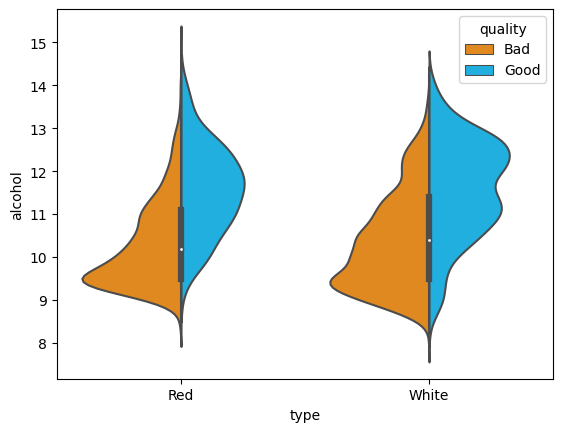

In [53]:
sns.violinplot(data=wine_df, x="type", y="alcohol", hue="quality", split=True, palette=["darkorange", "deepskyblue"])

In [70]:
wine_df["quality"].value_counts()

0    4311
1    1009
Name: quality, dtype: int64

In [71]:
# Define the features set.
X = wine_df.copy()
X = X.drop("quality", axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [72]:
# Define the target set.
y = wine_df['quality']
y[:5]

0    0
1    0
2    0
3    0
5    0
Name: quality, dtype: int64

In [73]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [74]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [75]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [76]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [77]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 'Good'", "Actual 'Bad'"], columns=["Predicted 'Good'", "Predicted'Bad'"])

cm_df

,Predicted 'Good',Predicted'Bad'
Actual 'Good',1027,50
Actual 'Bad',155,98


In [79]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [80]:
# Displaying results
print("Quality Prediction")
print ("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Quality Prediction
Confusion Matrix


,Predicted 'Good',Predicted'Bad'
Actual 'Good',1027,50
Actual 'Bad',155,98


Accuracy Score : 0.8458646616541353
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1077
           1       0.66      0.39      0.49       253

    accuracy                           0.85      1330
   macro avg       0.77      0.67      0.70      1330
weighted avg       0.83      0.85      0.83      1330



In [81]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.06530836, 0.08020435, 0.07134246, 0.081628  , 0.08612455,
       0.08185435, 0.08507329, 0.11799766, 0.08021482, 0.08568112,
       0.16157294, 0.0029981 ])

In [82]:
# Sort the features by their importance.
print ("Quality Prediction Feature Importance")
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

Quality Prediction Feature Importance


[(0.16157294163051544, 'alcohol'),
 (0.11799766038378016, 'density'),
 (0.0861245515682511, 'chlorides'),
 (0.08568112100031045, 'sulphates'),
 (0.08507329063842427, 'total sulfur dioxide'),
 (0.08185434904130762, 'free sulfur dioxide'),
 (0.08162800042019658, 'residual sugar'),
 (0.08021482207356466, 'pH'),
 (0.08020434591976978, 'volatile acidity'),
 (0.07134246196090638, 'citric acid'),
 (0.06530835601608387, 'fixed acidity'),
 (0.0029980993468896717, 'type')]

In [84]:
corr=wine_df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.049841,-0.486253
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.144361,-0.645335
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.060672,0.183759
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.084868,0.328695
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.161027,-0.499517
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.011325,0.465326
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.067307,0.694229
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.294971,-0.429377
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.048330,-0.310919
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.036771,-0.490364


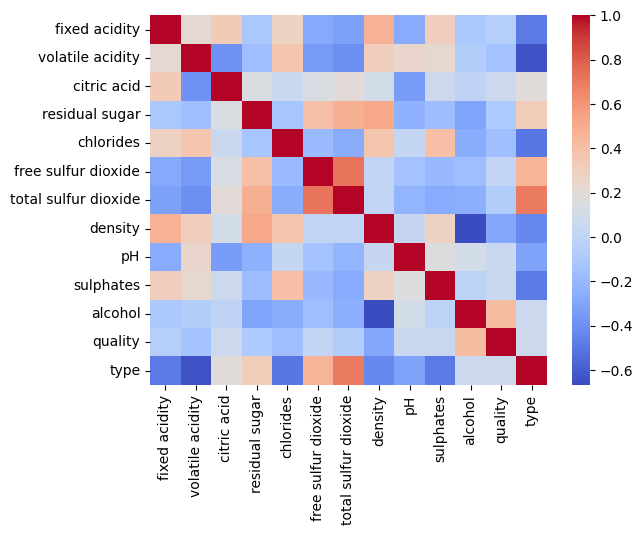

In [89]:
corr_map = sns.heatmap(corr,cmap="coolwarm")